In [1]:
import sys
from itertools import product, combinations
from os import listdir
import numpy as np
import scipy.stats as stats
import json
import matplotlib.pyplot as plt

In [2]:
family_id = 'AU0001'
data_dir = '../../DATA/ihart.ms2/family_genotype_counts'

gens = ['0/0', '0/1', '1/1']
obss = ['0/0', '0/1', '1/1', './.']
chroms = [str(x) for x in range(1, 23)]


In [3]:
m = 6
counts = np.zeros((len(obss),)*m, dtype=int)

for i, chrom in enumerate(chroms):
    print(chrom, end=' ')
    
    count_files = sorted([f for f in listdir(data_dir) if ('chr.%s.' % chrom) in f and 'famgen.counts.txt' in f])
    for count_file in count_files:
        with open('%s/%s' % (data_dir, count_file), 'r') as f:
            for line in f:
                famkey = line.strip().split('\t', maxsplit=1)[0]
                if famkey == family_id:
                    pieces = line.strip().split('\t')
                    individuals = pieces[1].split('.')
                    m = len(individuals)

                    for g, c in zip(product(range(len(obss)), repeat=m), pieces[2:]):
                        counts[g] += int(c)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

In [4]:
print(individuals)

['AU000101', 'AU000102', 'AU000103', 'AU000104', 'AU000105', 'AU000106']


In [5]:

fam_het_precision = np.zeros((m-2, 4))
fam_homalt_precision = np.zeros((m-2, 4))
fam_het_recall = np.zeros((m-2, 4))
fam_homalt_recall = np.zeros((m-2, 4))
fam_het_f1 = np.zeros((m-2, 4))
fam_homalt_f1 = np.zeros((m-2, 4))

p_child_gen_obs = np.zeros((m-2, 4, 3, 4))
p_mom_gen_obs = np.zeros((m-2, 4, 3, 4))
p_dad_gen_obs = np.zeros((m-2, 4, 3, 4))

for subsample_index in range(1, 4):
    with open('../params/ihart.ms2_AU0001_subsample%d_params.json' % subsample_index, 'r') as f:
        params = json.load(f)
    
    for child_index in range(m-2):
        key = '%s.%s.%d.%s' % (family_id, individuals[2+child_index], subsample_index, individuals[2+child_index])
        fam_het_precision[child_index, subsample_index-1] = params[key]['precision_0/1']
        fam_homalt_precision[child_index, subsample_index-1] = params[key]['precision_1/1']
        fam_het_recall[child_index, subsample_index-1] = params[key]['recall_0/1']
        fam_homalt_recall[child_index, subsample_index-1] = params[key]['recall_1/1']
        fam_het_f1[child_index, subsample_index-1] = params[key]['F1_0/1']
        fam_homalt_f1[child_index, subsample_index-1] = params[key]['F1_1/1']
        
        for gen_index, gen in enumerate(gens):
            for obs_index, obs in enumerate(obss):
                p_child_gen_obs[child_index, subsample_index-1, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]

        key = '%s.%s.%d.%s' % (family_id, individuals[2+child_index], subsample_index, individuals[0])
        for gen_index, gen in enumerate(gens):
            for obs_index, obs in enumerate(obss):
                p_mom_gen_obs[child_index, subsample_index-1, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]


        key = '%s.%s.%d.%s' % (family_id, individuals[2+child_index], subsample_index, individuals[1])
        for gen_index, gen in enumerate(gens):
            for obs_index, obs in enumerate(obss):
                p_dad_gen_obs[child_index, subsample_index-1, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]

        
# full family
with open('../params/ihart.ms2_AU0001_subsample4_params.json', 'r') as f:
    params = json.load(f)
    
for child_index in range(m-2):
    key = '%s.%s' % (family_id, individuals[2+child_index])
    fam_het_precision[child_index, 3] = params[key]['precision_0/1']
    fam_homalt_precision[child_index, 3] = params[key]['precision_1/1']
    fam_het_recall[child_index, 3] = params[key]['recall_0/1']
    fam_homalt_recall[child_index, 3] = params[key]['recall_1/1']
    fam_het_f1[child_index, 3] = params[key]['F1_0/1']
    fam_homalt_f1[child_index, 3] = params[key]['F1_1/1']
    for gen_index, gen in enumerate(gens):
        for obs_index, obs in enumerate(obss):
            p_child_gen_obs[child_index, 3, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]

    key = '%s.%s' % (family_id, individuals[0])
    for gen_index, gen in enumerate(gens):
        for obs_index, obs in enumerate(obss):
            p_mom_gen_obs[child_index, 3, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]


    key = '%s.%s' % (family_id, individuals[1])
    for gen_index, gen in enumerate(gens):
        for obs_index, obs in enumerate(obss):
            p_dad_gen_obs[child_index, 3, gen_index, obs_index] = params[key]['-log10(P[obs=%s|true_gen=%s])' % (obs, gen)]

    
print(fam_het_precision)
print(fam_homalt_precision)
print(fam_het_recall)
print(fam_homalt_recall)

#print(fam_exp_obs_gen)

[[0.99903389 0.99882076 0.99899031 0.99910405]
 [0.99888837 0.99854791 0.99871948 0.99880986]
 [0.9988168  0.99858281 0.99875419 0.99883849]
 [0.99897368 0.99873429 0.99889331 0.99898321]]
[[0.99842873 0.99920993 0.99943061 0.99952962]
 [0.99818849 0.99889385 0.99907575 0.99916183]
 [0.99833056 0.99909941 0.9993011  0.99939038]
 [0.99832371 0.99915884 0.99932726 0.99944058]]
[[0.9964383  0.99818934 0.99864998 0.9988935 ]
 [0.99590516 0.99759766 0.99801157 0.9982143 ]
 [0.9956735  0.99754869 0.99802056 0.99826389]
 [0.99623072 0.99789772 0.99833327 0.99862061]]
[[0.99927297 0.99911454 0.99926366 0.99936852]
 [0.99940077 0.99927012 0.99937259 0.99944184]
 [0.99911151 0.99901613 0.9991929  0.99928437]
 [0.99916817 0.99905285 0.99917469 0.9992733 ]]


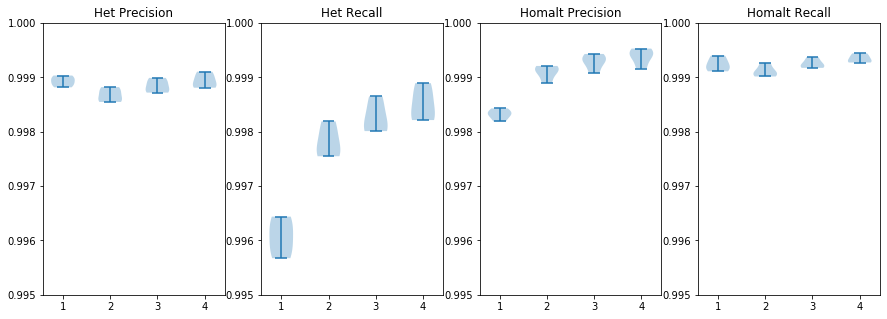

In [6]:
# How does family size affect this?

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.violinplot(fam_het_precision)
plt.title('Het Precision')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 2)
plt.violinplot(fam_het_recall)
plt.title('Het Recall')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 3)
plt.violinplot(fam_homalt_precision)
plt.title('Homalt Precision')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 4)
plt.violinplot(fam_homalt_recall)
plt.title('Homalt Recall')
plt.ylim([0.995, 1])
plt.show()

In [7]:
print(p_child_gen_obs[:, :, gens.index(gen), obss.index(obs)])

[[3.38872593 3.53897817 3.65728721 3.7549116 ]
 [3.35040882 3.5272922  3.59378464 3.67583717]
 [3.28503427 3.42557078 3.49545907 3.56618093]
 [3.39063037 3.59401481 3.67228075 3.75677983]]


//anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


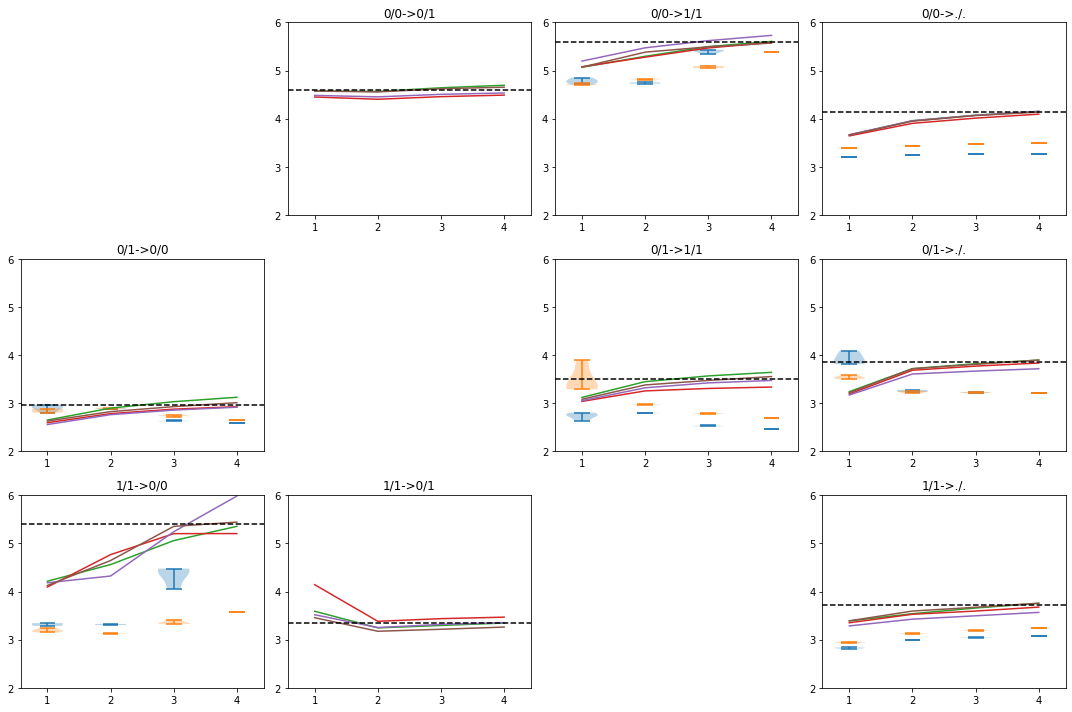

In [8]:
# How does family size affect this?

plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 2)
for i, (gen, obs) in enumerate(product(gens, obss)):
    if gen != obs:
        plt.subplot(3, 4, i+1, sharex=ax, sharey=ax)
        plt.violinplot(p_mom_gen_obs[:, :, gens.index(gen), obss.index(obs)])
        plt.violinplot(p_dad_gen_obs[:, :, gens.index(gen), obss.index(obs)])
        for j in range(4):
            plt.plot(range(1, 5), p_child_gen_obs[j, :, gens.index(gen), obss.index(obs)])
        
        plt.title('%s->%s' % (gen, obs))
        plt.axhline(np.median(p_child_gen_obs[:, 3, gens.index(gen), obss.index(obs)]), color='black', linestyle='--')
    plt.ylim([2, 6])
plt.tight_layout()
plt.show()

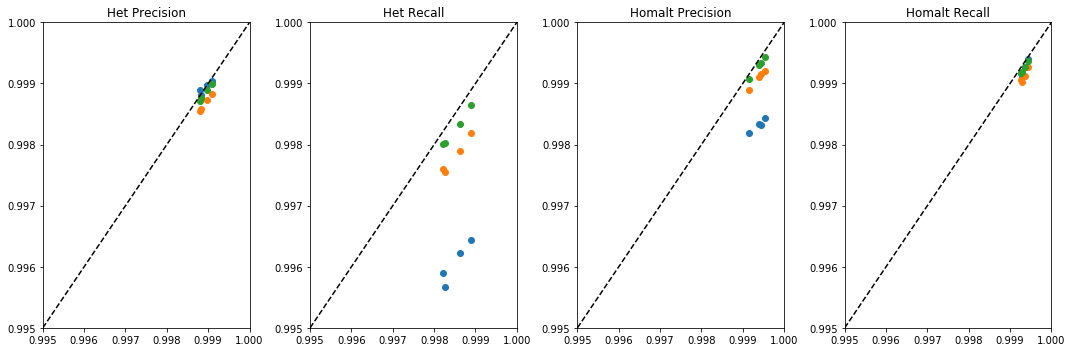

In [9]:
# How does family size affect this?

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(fam_het_precision[:, 3], fam_het_precision[:, 0])
plt.scatter(fam_het_precision[:, 3], fam_het_precision[:, 1])
plt.scatter(fam_het_precision[:, 3], fam_het_precision[:, 2])
plt.title('Het Precision')
plt.xlim([0.995, 1])
plt.ylim([0.995, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.subplot(1, 4, 2)
plt.scatter(fam_het_recall[:, 3], fam_het_recall[:, 0])
plt.scatter(fam_het_recall[:, 3], fam_het_recall[:, 1])
plt.scatter(fam_het_recall[:, 3], fam_het_recall[:, 2])
plt.title('Het Recall')
plt.xlim([0.995, 1])
plt.ylim([0.995, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')


plt.subplot(1, 4, 3)
plt.scatter(fam_homalt_precision[:, 3], fam_homalt_precision[:, 0])
plt.scatter(fam_homalt_precision[:, 3], fam_homalt_precision[:, 1])
plt.scatter(fam_homalt_precision[:, 3], fam_homalt_precision[:, 2])
plt.title('Homalt Precision')
plt.xlim([0.995, 1])
plt.ylim([0.995, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.subplot(1, 4, 4)
plt.scatter(fam_homalt_recall[:, 3], fam_homalt_recall[:, 0])
plt.scatter(fam_homalt_recall[:, 3], fam_homalt_recall[:, 1])
plt.scatter(fam_homalt_recall[:, 3], fam_homalt_recall[:, 2])
plt.title('Homalt Recall')
plt.xlim([0.995, 1])
plt.ylim([0.995, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [10]:
consensus = -np.ones((len(obss),)*m, dtype=np.int8)
for sibgen in product(range(len(obss)), repeat=m-2):
    mode = stats.mode(sibgen)
    if mode.count[0]>=3 and mode.mode[0] != 3:
        consensus_value = mode.mode[0]
        consensus[(slice(None, None, None), slice(None, None, None)) + sibgen] = consensus_value
print(np.sum(counts[consensus!=-1])/np.sum(counts))

0.9988408691578041


In [11]:
print(np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (0,)*4]))
print(np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (1,)*4]))
print(np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (2,)*4]))
print(np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (3,)*4]))


59822057
1983467
1277802
37521


In [12]:
full_consensus = np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (0,)*4]) + \
                    np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (1,)*4]) + \
                    np.sum(counts[(slice(None, None, None), slice(None, None, None)) + (2,)*4])
print((np.sum(counts[consensus!=-1])-full_consensus)/(np.sum(counts)-full_consensus))

0.40683798050455


In [13]:
# consensus method
cons_het_precision = np.zeros((m-2,))
cons_homalt_precision = np.zeros((m-2,))
cons_het_recall = np.zeros((m-2,))
cons_homalt_recall = np.zeros((m-2,))
cons_het_f1 = np.zeros((m-2,))
cons_homalt_f1 = np.zeros((m-2,))

cons_exp_obs_gen = np.zeros((m-2, 4, 3))

cons_p_child_gen_obs = np.zeros((m-2, 3, 4))

for child_index in range(m-2):
    child_value = -np.ones((len(obss),)*m, dtype=np.int8)
    for i in range(len(obss)):
        child_value[(slice(None, None, None), slice(None, None, None)) + tuple(i if k==child_index else slice(None, None, None) for k in range(m-2))] = i

    is_tp_het = (consensus!=-1) & (consensus==1) & (child_value==1)
    is_fn_het = (consensus!=-1) & (consensus==1) & (child_value!=1)
    is_fp_het = (consensus!=-1) & (consensus!=1) & (child_value==1)
    is_tn_het = (consensus!=-1) & (consensus!=1) & (child_value!=1)
    
    is_tp_homalt = (consensus!=-1) & (consensus==2) & (child_value==2)
    is_fn_homalt = (consensus!=-1) & (consensus==2) & (child_value!=2)
    is_fp_homalt = (consensus!=-1) & (consensus!=2) & (child_value==2)
    is_tn_homalt = (consensus!=-1) & (consensus!=2) & (child_value!=2)
        
    cons_het_precision[child_index] = np.sum(counts[is_tp_het])/(np.sum(counts[is_tp_het])+np.sum(counts[is_fp_het]))
    cons_homalt_precision[child_index] = np.sum(counts[is_tp_homalt])/(np.sum(counts[is_tp_homalt])+np.sum(counts[is_fp_homalt]))
    cons_het_recall[child_index] = np.sum(counts[is_tp_het])/(np.sum(counts[is_tp_het])+np.sum(counts[is_fn_het]))
    cons_homalt_recall[child_index] = np.sum(counts[is_tp_homalt])/(np.sum(counts[is_tp_homalt])+np.sum(counts[is_fn_homalt]))
    cons_het_f1[child_index] = np.sum(counts[is_tp_het])/(np.sum(counts[is_tp_het])+0.5*(np.sum(counts[is_fp_het])+np.sum(counts[is_fn_het])))
    cons_homalt_f1[child_index] = np.sum(counts[is_tp_homalt])/(np.sum(counts[is_tp_homalt])+0.5*(np.sum(counts[is_fp_homalt])+np.sum(counts[is_fn_homalt])))

    for i, obs in enumerate(obss):
        for j, gen in enumerate(gens):
            cons_exp_obs_gen[child_index, i, j] = np.sum(counts[(consensus==j) & (child_value==i)])
            cons_p_child_gen_obs[child_index, j, i] = -np.log10(np.sum(counts[(consensus==j) & (child_value==i)])/np.sum(counts[consensus==j]))


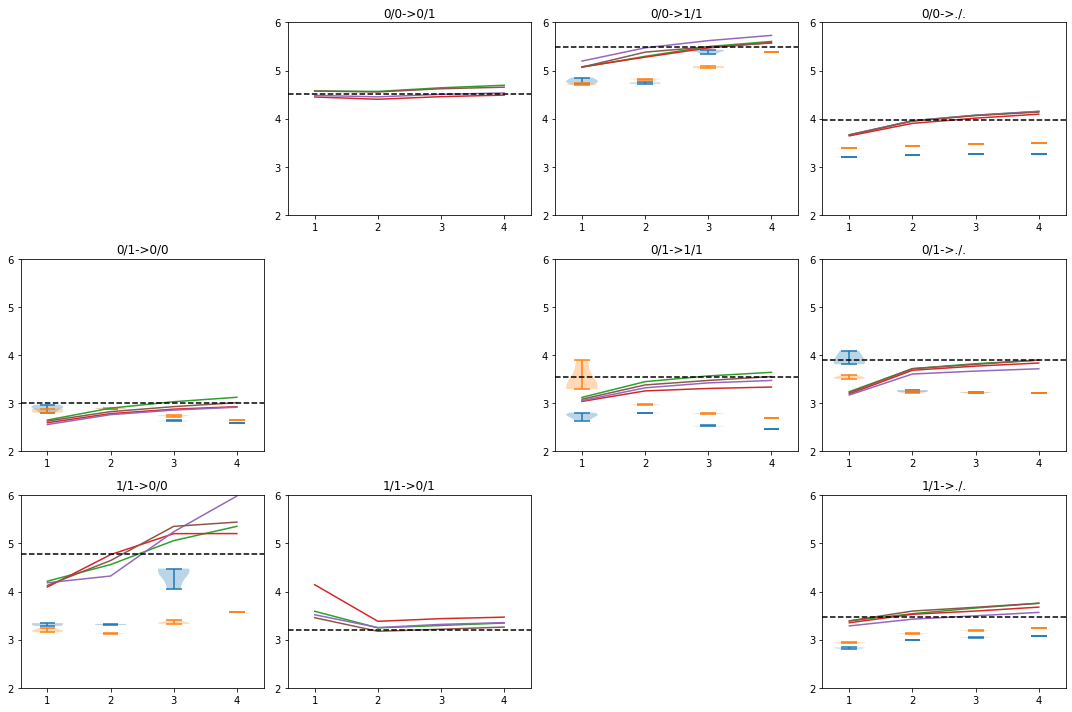

In [14]:
# How does family size affect this?

plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 2)
for i, (gen, obs) in enumerate(product(gens, obss)):
    if gen != obs:
        plt.subplot(3, 4, i+1, sharex=ax, sharey=ax)
        plt.violinplot(p_mom_gen_obs[:, :, gens.index(gen), obss.index(obs)])
        plt.violinplot(p_dad_gen_obs[:, :, gens.index(gen), obss.index(obs)])
        for j in range(4):
            plt.plot(range(1, 5), p_child_gen_obs[j, :, gens.index(gen), obss.index(obs)])
        
        plt.title('%s->%s' % (gen, obs))
        plt.axhline(np.median(cons_p_child_gen_obs[:, gens.index(gen), obss.index(obs)]), color='black', linestyle='--')
    plt.ylim([2, 6])
plt.tight_layout()
plt.show()

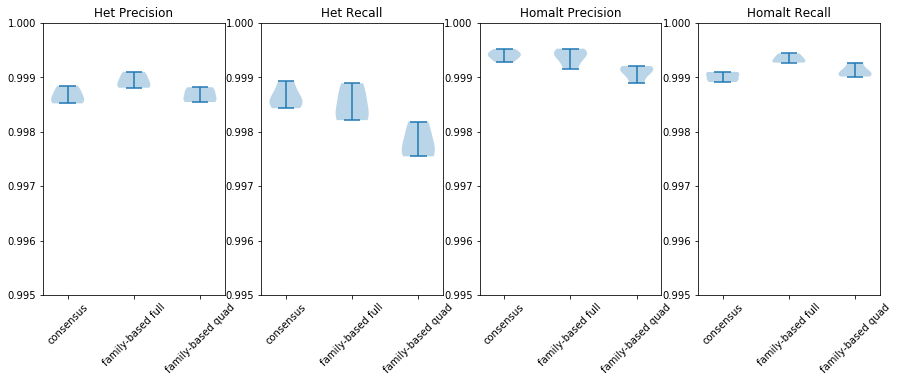

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.violinplot([cons_het_precision, fam_het_precision[:, 3], fam_het_precision[:, 1]])
plt.xticks([1, 2, 3], ['consensus', 'family-based full', 'family-based quad'], rotation=45)
plt.title('Het Precision')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 2)
plt.violinplot([cons_het_recall, fam_het_recall[:, 3], fam_het_recall[:, 1]])
plt.xticks([1, 2, 3], ['consensus', 'family-based full', 'family-based quad'], rotation=45)
plt.title('Het Recall')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 3)
plt.violinplot([cons_homalt_precision, fam_homalt_precision[:, 3], fam_homalt_precision[:, 1]])
plt.xticks([1, 2, 3], ['consensus', 'family-based full', 'family-based quad'], rotation=45)
plt.title('Homalt Precision')
plt.ylim([0.995, 1])

plt.subplot(1, 4, 4)
plt.violinplot([cons_homalt_recall, fam_homalt_recall[:, 3], fam_homalt_recall[:, 1]])
plt.xticks([1, 2, 3], ['consensus', 'family-based full', 'family-based quad'], rotation=45)
plt.title('Homalt Recall')
plt.ylim([0.995, 1])
plt.show()

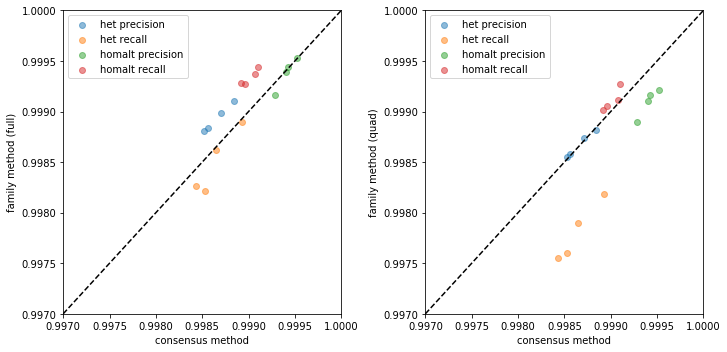

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(cons_het_precision, fam_het_precision[:, 3], label='het precision', alpha=0.5)
plt.scatter(cons_het_recall, fam_het_recall[:, 3], label='het recall', alpha=0.5)
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 3], label='homalt precision', alpha=0.5)
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 3], label='homalt recall', alpha=0.5)
plt.xlim([0.997, 1])
plt.ylim([0.997, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.xlabel('consensus method')
plt.ylabel('family method (full)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(cons_het_precision, fam_het_precision[:, 1], label='het precision', alpha=0.5)
plt.scatter(cons_het_recall, fam_het_recall[:, 1], label='het recall', alpha=0.5)
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 1], label='homalt precision', alpha=0.5)
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 1], label='homalt recall', alpha=0.5)
plt.xlim([0.997, 1])
plt.ylim([0.997, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.xlabel('consensus method')
plt.ylabel('family method (quad)')
plt.legend()

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


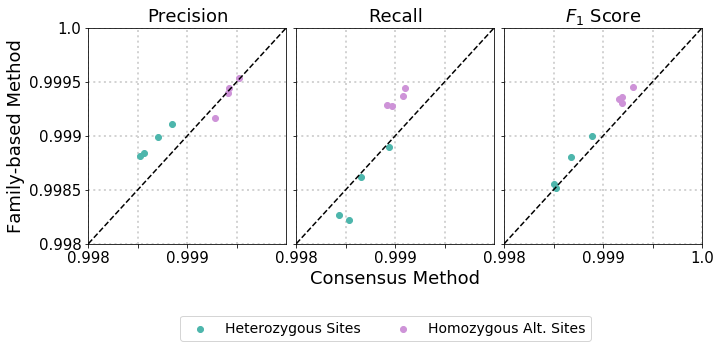

In [17]:
fig = plt.figure(figsize=(11, 5))

ticks = [0.998, 0.9985, 0.999, 0.9995, 1.0]
ticklabels = [str(x) for x in ticks]

ax = plt.subplot(1, 3, 1)
plt.scatter(cons_het_precision, fam_het_precision[:, 3], color='#4db6ac', label='Heterozygous Sites')
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 3], color='#ce93d8', label='Homozygous Alt. Sites')
plt.xlim([ticks[0], ticks[-1]])
plt.ylim([ticks[0], ticks[-1]])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')
plt.title('Precision', fontsize=18)
plt.ylabel('Family-based Method', fontsize=18)
plt.grid(True, linewidth=2, zorder=0, color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
plt.legend(loc='lower center', ncol=2,
                   bbox_to_anchor=(1.5, -0.45), borderaxespad=0., fontsize=14, frameon=True)
plt.xticks(ticks[:-1], [x if i%2==0 else '' for i, x in enumerate(ticklabels[:-1])], fontsize=15)
plt.yticks(ticks, ticklabels, fontsize=15)

ax = plt.subplot(1, 3, 2)
plt.scatter(cons_het_recall, fam_het_recall[:, 3], color='#4db6ac')
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 3], color='#ce93d8')
plt.xlim([ticks[0], ticks[-1]])
plt.ylim([ticks[0], ticks[-1]])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')
plt.title('Recall', fontsize=18)
plt.xlabel('Consensus Method', fontsize=18)
plt.grid(True, linewidth=2, zorder=0, color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
plt.xticks(ticks[:-1], [x if i%2==0 else '' for i, x in enumerate(ticklabels[:-1])], fontsize=15)
plt.yticks(ticks, ['' for _ in ticks], fontsize=15)

ax = plt.subplot(1, 3, 3)
plt.scatter(cons_het_f1, fam_het_f1[:, 3], color='#4db6ac')
plt.scatter(cons_homalt_f1, fam_homalt_f1[:, 3], color='#ce93d8')
plt.title('$F_1$ Score', fontsize=18)
plt.xlim([ticks[0], ticks[-1]])
plt.ylim([ticks[0], ticks[-1]])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')
plt.grid(True, linewidth=2, zorder=0, color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
plt.xticks(ticks, [x if i%2==0 else '' for i, x in enumerate(ticklabels)], fontsize=15)
plt.yticks(ticks, ['' for _ in ticks], fontsize=15)

fig.subplots_adjust(wspace=0.05, hspace=0.0, top=0.9, bottom=0.3)
plt.savefig('../plots/consensus.eps')
plt.show()

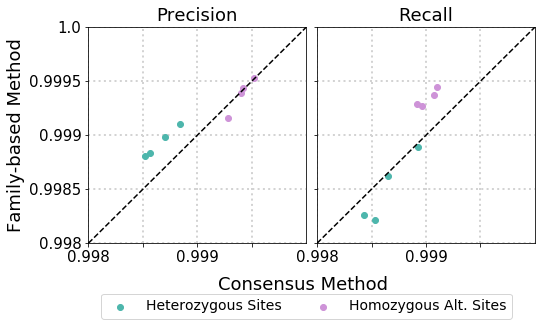

In [41]:
fig = plt.figure(figsize=(8, 5))

ticks = [0.998, 0.9985, 0.999, 0.9995, 1.0]
ticklabels = [str(x) for x in ticks]

ax = plt.subplot(1, 2, 1)
plt.scatter(cons_het_precision, fam_het_precision[:, 3], color='#4db6ac', label='Heterozygous Sites')
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 3], color='#ce93d8', label='Homozygous Alt. Sites')
plt.xlim([ticks[0], ticks[-1]])
plt.ylim([ticks[0], ticks[-1]])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')
plt.title('Precision', fontsize=18)
plt.ylabel('Family-based Method', fontsize=18)
plt.grid(True, linewidth=2, zorder=0, color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
plt.legend(loc='lower center', ncol=2,
                   bbox_to_anchor=(1, -0.35), borderaxespad=0., fontsize=14, frameon=True)
plt.xticks(ticks[:-1], [x if i%2==0 else '' for i, x in enumerate(ticklabels[:-1])], fontsize=15)
plt.yticks(ticks, ticklabels, fontsize=15)

ax = plt.subplot(1, 2, 2)
plt.scatter(cons_het_recall, fam_het_recall[:, 3], color='#4db6ac')
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 3], color='#ce93d8')
plt.xlim([ticks[0], ticks[-1]])
plt.ylim([ticks[0], ticks[-1]])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')
plt.title('Recall', fontsize=18, ha='center')
#plt.xlabel('Consensus Method', fontsize=18)

plt.grid(True, linewidth=2, zorder=0, color='lightgrey', linestyle=':')
ax.set_axisbelow(True)
plt.xticks(ticks[:-1], [x if i%2==0 else '' for i, x in enumerate(ticklabels[:-1])], fontsize=15)
plt.yticks(ticks, ['' for _ in ticks], fontsize=15)

fig.subplots_adjust(wspace=0.05, hspace=0.0, top=0.9, bottom=0.3)

fig.text(0.35, 0.17, 'Consensus Method', fontsize=18)

plt.show()

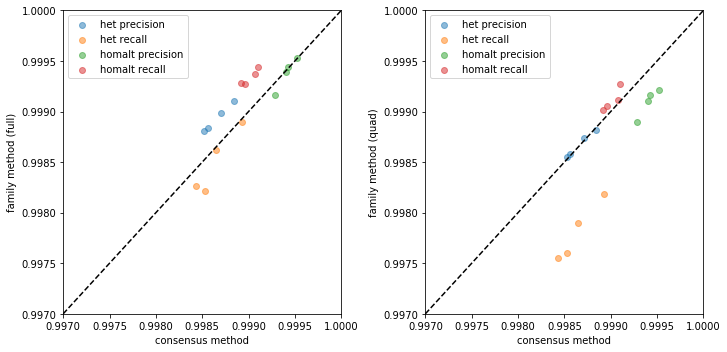

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(cons_het_precision, fam_het_precision[:, 3], label='het precision', alpha=0.5)
plt.scatter(cons_het_recall, fam_het_recall[:, 3], label='het recall', alpha=0.5)
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 3], label='homalt precision', alpha=0.5)
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 3], label='homalt recall', alpha=0.5)
plt.xlim([0.997, 1])
plt.ylim([0.997, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.xlabel('consensus method')
plt.ylabel('family method (full)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(cons_het_precision, fam_het_precision[:, 1], label='het precision', alpha=0.5)
plt.scatter(cons_het_recall, fam_het_recall[:, 1], label='het recall', alpha=0.5)
plt.scatter(cons_homalt_precision, fam_homalt_precision[:, 1], label='homalt precision', alpha=0.5)
plt.scatter(cons_homalt_recall, fam_homalt_recall[:, 1], label='homalt recall', alpha=0.5)
plt.xlim([0.997, 1])
plt.ylim([0.997, 1])
plt.plot(plt.xlim(), plt.xlim(), color='black', linestyle='--')

plt.xlabel('consensus method')
plt.ylabel('family method (quad)')
plt.legend()

plt.tight_layout()
plt.show()